In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

### Q7: What products have been sold through card or mobile since X days?

In [10]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT i.item_name, tim.date, tr.trans_type " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              " JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key "\
              " JOIN ecomdb_star_schema.trans_dim tr on tr.payment_key=f.payment_key "\
              " Where tr.trans_type ='mobile'"\
              " GROUP BY CUBE(i.item_name,tim.date ,tr.trans_type)"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(None, None, None),
 ('Nabisco Classic Mix ccooki, cracker',
  datetime.datetime(2016, 2, 8, 2, 41),
  'mobile'),
 ("Welch's 100% Juice Variety10 oz",
  datetime.datetime(2016, 3, 11, 9, 37),
  'mobile'),
 ('Njoy Sugar Canister 22 oz',
  datetime.datetime(2018, 12, 24, 7, 52),
  'mobile'),
 ('Cheez It White Cheddar 1.5 oz',
  datetime.datetime(2019, 1, 27, 21, 3),
  'mobile'),
 ('Sunkist Orange - 12 oz cans',
  datetime.datetime(2016, 2, 29, 0, 26),
  'mobile'),
 ('Hazelnut International Delight',
  datetime.datetime(2019, 1, 15, 11, 45),
  'mobile'),
 ('Monster Original Green 16 oz',
  datetime.datetime(2018, 9, 11, 9, 46),
  'mobile'),
 ('Diet Fuze Iced Tea', datetime.datetime(2017, 7, 7, 13, 35), 'mobile'),
 ('K Cups –Organic Breakfast Blend',
  datetime.datetime(2016, 7, 30, 4, 50),
  'mobile'),
 ('Red Bull 8.4 oz', datetime.datetime(2014, 11, 27, 18, 45), 'mobile'),
 ('K Cups Hot Cocoa', datetime.datetime(2018, 4, 25, 0, 27), 'mobile'),
 ('Coke Classic 12 oz cans', datetime.datet

In [11]:
df = pd.DataFrame(list(records), columns=['Item_name', 'Date' ,'Trans_type'])
df.head(10)

,Item_name,Date,Trans_type
0,None,NaT,None
1,"Nabisco Classic Mix ccooki, cracker",2016-02-08 02:41:00,mobile
2,Welch's 100% Juice Variety10 oz,2016-03-11 09:37:00,mobile
3,Njoy Sugar Canister 22 oz,2018-12-24 07:52:00,mobile
4,Cheez It White Cheddar 1.5 oz,2019-01-27 21:03:00,mobile
5,Sunkist Orange - 12 oz cans,2016-02-29 00:26:00,mobile
6,Hazelnut International Delight,2019-01-15 11:45:00,mobile
7,Monster Original Green 16 oz,2018-09-11 09:46:00,mobile
8,Diet Fuze Iced Tea,2017-07-07 13:35:00,mobile
9,K Cups –Organic Breakfast Blend,2016-07-30 04:50:00,mobile


In [13]:
df1=df.dropna()
df1.head(10)

,Item_name,Date,Trans_type
1,"Nabisco Classic Mix ccooki, cracker",2016-02-08 02:41:00,mobile
2,Welch's 100% Juice Variety10 oz,2016-03-11 09:37:00,mobile
3,Njoy Sugar Canister 22 oz,2018-12-24 07:52:00,mobile
4,Cheez It White Cheddar 1.5 oz,2019-01-27 21:03:00,mobile
5,Sunkist Orange - 12 oz cans,2016-02-29 00:26:00,mobile
6,Hazelnut International Delight,2019-01-15 11:45:00,mobile
7,Monster Original Green 16 oz,2018-09-11 09:46:00,mobile
8,Diet Fuze Iced Tea,2017-07-07 13:35:00,mobile
9,K Cups –Organic Breakfast Blend,2016-07-30 04:50:00,mobile
10,Red Bull 8.4 oz,2014-11-27 18:45:00,mobile


In [28]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT i.item_name, tim.date, tr.trans_type " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              " JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key "\
              " JOIN ecomdb_star_schema.trans_dim tr on tr.payment_key=f.payment_key "\
              " Where tr.trans_type ='mobile'" \
              " and (tim.date> NOW() - INTERVAL '435 days')" \
              " GROUP BY CUBE(i.item_name,tim.date ,tr.trans_type)"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(None, None, None),
 ('Sargento Bal. Breaks (fruit, nut, cheese)',
  datetime.datetime(2021, 5, 1, 9, 24),
  'mobile'),
 ('Cliff Builders Protein Bar Variety Pack',
  datetime.datetime(2020, 12, 31, 20, 31),
  'mobile'),
 ('Njoy Creamer Packs', datetime.datetime(2020, 12, 10, 23, 57), 'mobile'),
 ('Gardettos Snacks', datetime.datetime(2021, 1, 18, 17, 38), 'mobile'),
 ('Clorox Bleach Large Jugs',
  datetime.datetime(2020, 12, 12, 11, 40),
  'mobile'),
 ('Kellogg Fun Mix Cheez it, Prngls, Fam Amos',
  datetime.datetime(2020, 12, 15, 1, 13),
  'mobile'),
 ('Red Bull Sugar Free 8.4 oz',
  datetime.datetime(2021, 1, 21, 16, 44),
  'mobile'),
 ('Nabisco Cookie Variety Pk Oreo/ChocChip',
  datetime.datetime(2020, 12, 31, 20, 31),
  'mobile'),
 ('Wonderful Pistachios (in shell)',
  datetime.datetime(2021, 8, 1, 22, 43),
  'mobile'),
 ('La Croix Sparkling Grapefruit 12 oz',
  datetime.datetime(2021, 12, 1, 15, 0),
  'mobile'),
 ('POM 2 ply paper towels', datetime.datetime(2021, 3, 1, 9, 17), 

In [29]:
df2 = pd.DataFrame(list(records), columns=['Item_name', 'Date' ,'Trans_type'])
df2.head(10)

,Item_name,Date,Trans_type
0,None,NaT,None
1,"Sargento Bal. Breaks (fruit, nut, cheese)",2021-05-01 09:24:00,mobile
2,Cliff Builders Protein Bar Variety Pack,2020-12-31 20:31:00,mobile
3,Njoy Creamer Packs,2020-12-10 23:57:00,mobile
4,Gardettos Snacks,2021-01-18 17:38:00,mobile
5,Clorox Bleach Large Jugs,2020-12-12 11:40:00,mobile
6,"Kellogg Fun Mix Cheez it, Prngls, Fam Amos",2020-12-15 01:13:00,mobile
7,Red Bull Sugar Free 8.4 oz,2021-01-21 16:44:00,mobile
8,Nabisco Cookie Variety Pk Oreo/ChocChip,2020-12-31 20:31:00,mobile
9,Wonderful Pistachios (in shell),2021-08-01 22:43:00,mobile


In [32]:
df3=df2.dropna()
df3.head(10)

,Item_name,Date,Trans_type
1,"Sargento Bal. Breaks (fruit, nut, cheese)",2021-05-01 09:24:00,mobile
2,Cliff Builders Protein Bar Variety Pack,2020-12-31 20:31:00,mobile
3,Njoy Creamer Packs,2020-12-10 23:57:00,mobile
4,Gardettos Snacks,2021-01-18 17:38:00,mobile
5,Clorox Bleach Large Jugs,2020-12-12 11:40:00,mobile
6,"Kellogg Fun Mix Cheez it, Prngls, Fam Amos",2020-12-15 01:13:00,mobile
7,Red Bull Sugar Free 8.4 oz,2021-01-21 16:44:00,mobile
8,Nabisco Cookie Variety Pk Oreo/ChocChip,2020-12-31 20:31:00,mobile
9,Wonderful Pistachios (in shell),2021-08-01 22:43:00,mobile
10,La Croix Sparkling Grapefruit 12 oz,2021-12-01 15:00:00,mobile


In [44]:
df4 = df3.iloc[0:10]
df4

,Item_name,Date,Trans_type
1,"Sargento Bal. Breaks (fruit, nut, cheese)",2021-05-01 09:24:00,mobile
2,Cliff Builders Protein Bar Variety Pack,2020-12-31 20:31:00,mobile
3,Njoy Creamer Packs,2020-12-10 23:57:00,mobile
4,Gardettos Snacks,2021-01-18 17:38:00,mobile
5,Clorox Bleach Large Jugs,2020-12-12 11:40:00,mobile
6,"Kellogg Fun Mix Cheez it, Prngls, Fam Amos",2020-12-15 01:13:00,mobile
7,Red Bull Sugar Free 8.4 oz,2021-01-21 16:44:00,mobile
8,Nabisco Cookie Variety Pk Oreo/ChocChip,2020-12-31 20:31:00,mobile
9,Wonderful Pistachios (in shell),2021-08-01 22:43:00,mobile
10,La Croix Sparkling Grapefruit 12 oz,2021-12-01 15:00:00,mobile


<AxesSubplot:xlabel='Item_name', ylabel='Date'>

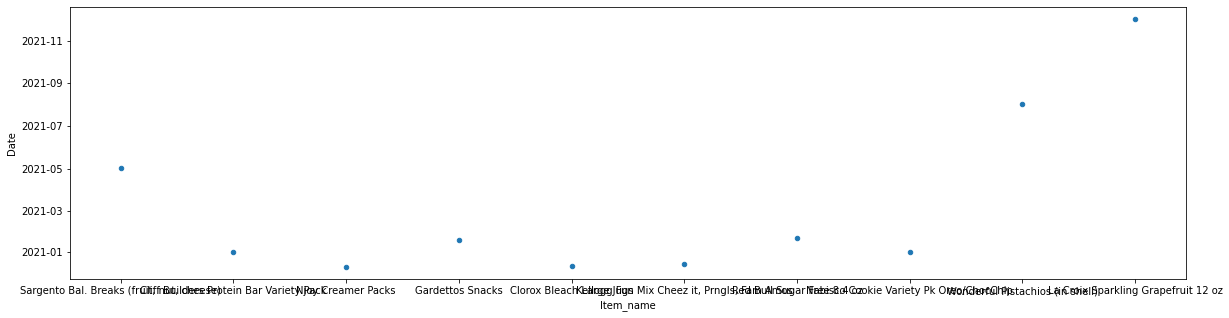

In [47]:
df4.plot.scatter('Item_name','Date',figsize=(20,5))